In [1]:
# import warnings
# warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
plt.rcParams.update({'font.size': 10, 'figure.figsize': (10, 10)})


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/envs/MLlingo/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df = pd.read_csv('data/house_price/train.csv')
test_df = pd.read_csv('data/house_price/test.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


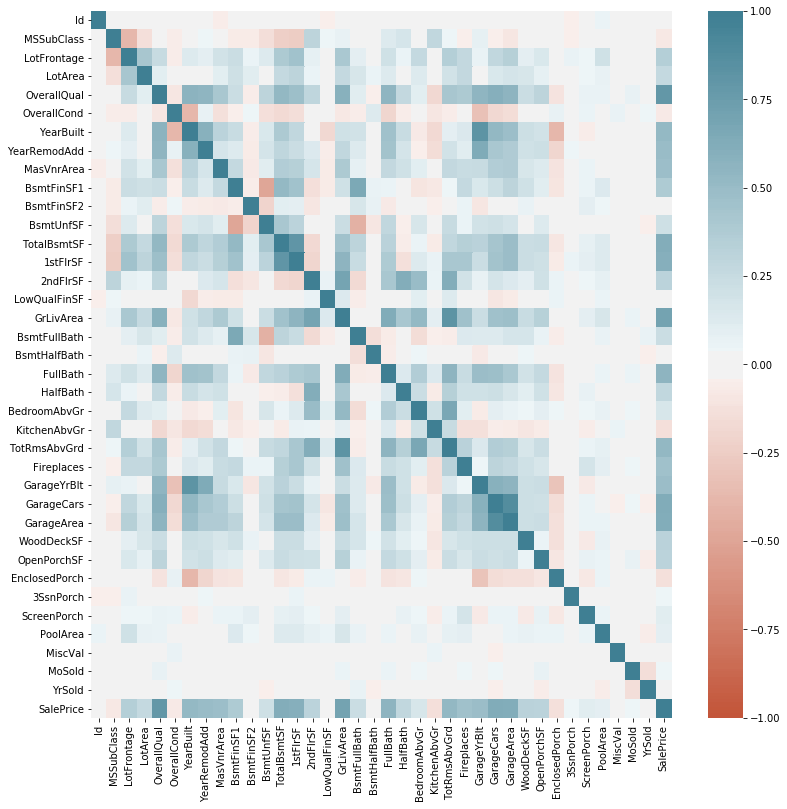

In [6]:
f, ax = plt.subplots(figsize=(13,13))
ax = sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200))

In [7]:
corr_threshold = 0.3  # Only take feature with higher correlation
cat_columns = df.select_dtypes(include=['O']).columns
corr_with_price = abs(df.corrwith(df['SalePrice']))
keep_num_column = list(corr_with_price[corr_with_price > corr_threshold].index)
keep_num_column.remove('SalePrice')
keep_cat_column = ['CentralAir', 'KitchenQual', 'LotShape']
print(keep_num_column)

['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']


In [8]:
# Feature Engineering
df.loc[ (df['LotShape'] != 'Reg'), 'LotShape'] = 'NonReg'
df.loc[(df['KitchenQual'] != 'Ex'), 'KitchenQual'] = 'NonEx'

test_df.loc[ (test_df['LotShape'] != 'Reg'), 'LotShape'] = 'NonReg'
test_df.loc[(test_df['KitchenQual'] != 'Ex'), 'KitchenQual'] = 'NonEx'
# df.loc[(df['BsmtQual'] != 'Ex'), 'BsmtQual'] = 'NonEx'
# df.loc[(df['ExterQual'] != 'Ex'), 'ExterQual'] = 'NonEx'

In [9]:
print(df['BsmtFinSF1'].corr(df['TotalBsmtSF']))
print(df['1stFlrSF'].corr(df['2ndFlrSF']))
print(df['GarageYrBlt'].corr(df['GarageCars']))

0.5223960519923857
-0.20264618100232085
0.5889200070047003


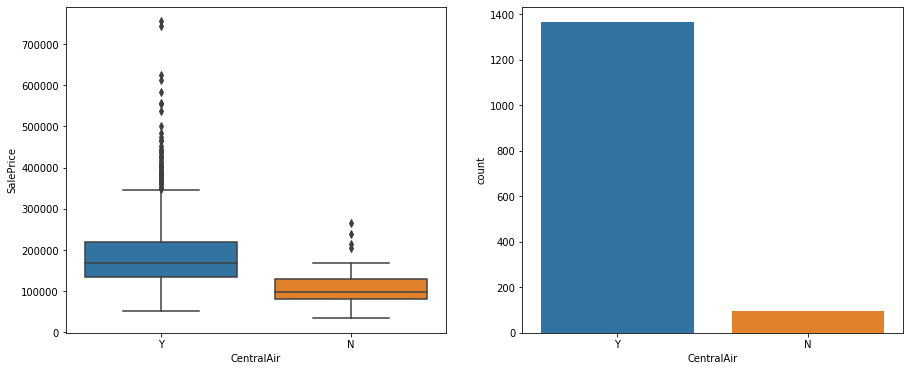

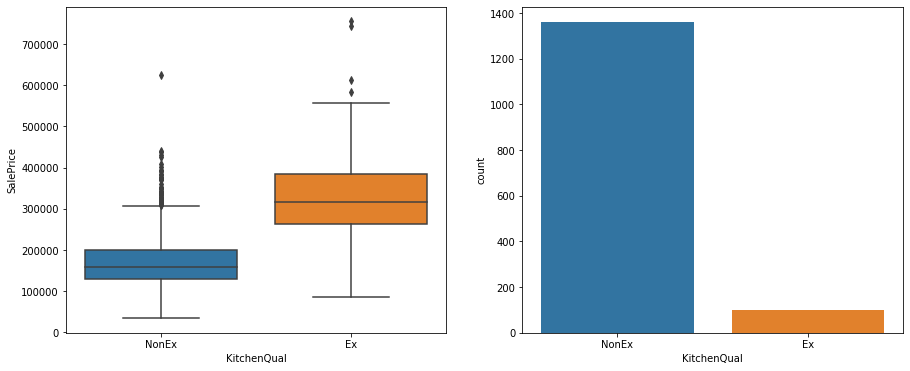

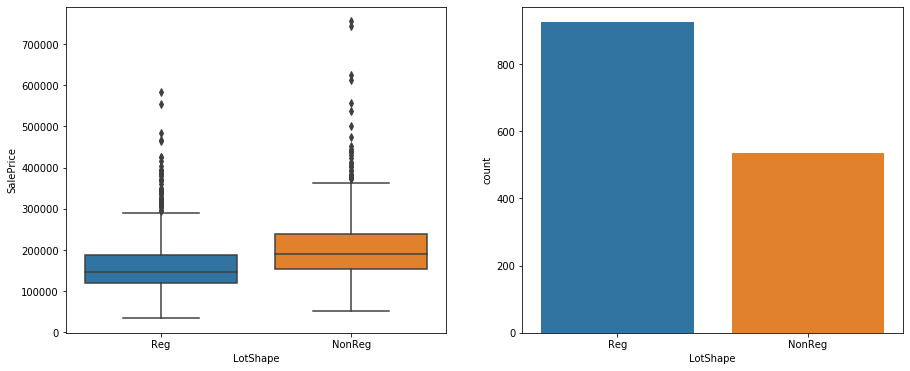

In [10]:
for column in keep_cat_column:
    f , (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    sns.boxplot(x=column, y='SalePrice', data=df, ax = ax1)
    sns.countplot(x = column, data=df, ax = ax2)

### SKlearn

In [11]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder, LabelBinarizer

from sklearn.linear_model import LassoCV, SGDRegressor, RidgeCV, ElasticNetCV, Lasso, Ridge, ElasticNet

In [12]:
cat_transformer = Pipeline(
    steps=[('cat_imputer', SimpleImputer(strategy='most_frequent')), ('encoder', OneHotEncoder(drop='first'))]
)
num_transofrmer = Pipeline(
    steps=[('imputer' , SimpleImputer(strategy='mean')), ('scaler', MinMaxScaler())]
)
col_transformer = ColumnTransformer(
    transformers=[
        ('cat', cat_transformer, keep_cat_column),
        ('num', num_transofrmer, keep_num_column),
    ]
)
X = col_transformer.fit_transform(df.drop(['SalePrice'], axis=1))
features_list = keep_num_column + keep_cat_column
y = df['SalePrice']

In [13]:
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.25, random_state=42)

best alpha: 278.32504683877266


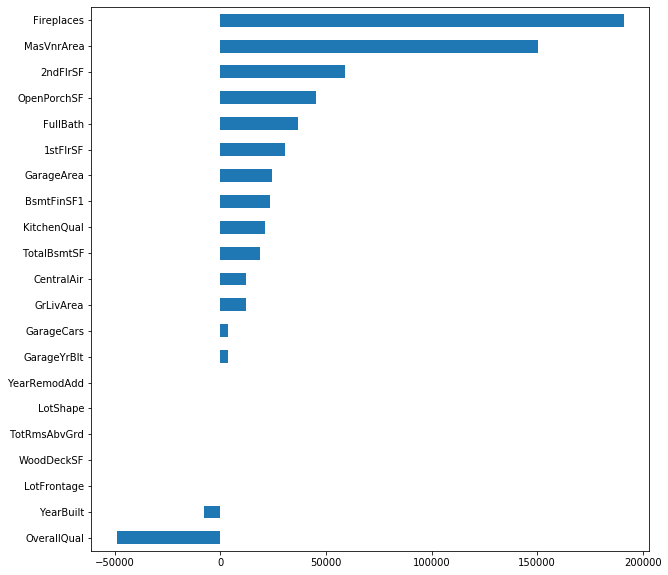

In [14]:
# LassoCV
clf_lasso = LassoCV().fit(X, y)
coef = pd.Series(clf_lasso.coef_, index = features_list).sort_values()
print("best alpha: " + str(clf_lasso.alpha_))
coef.plot(kind='barh')

In [15]:
print("R2: ", np.mean(cross_val_score(Lasso(alpha=84.99644775349047), X, y, scoring='r2')))

R2:  0.7896195352073571


alpha: 5.0


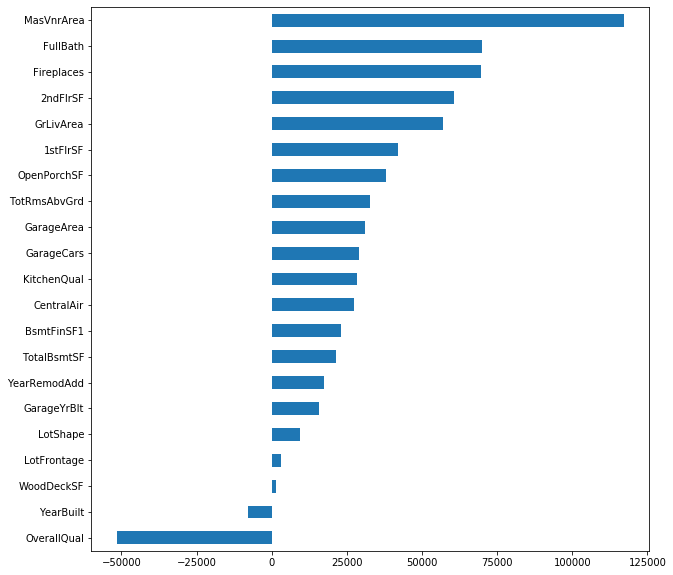

In [16]:
clf_ridge = RidgeCV(alphas=(1.0, 5.0, 6.0)).fit(X, y)
coef = pd.Series(clf_ridge.coef_, index = features_list).sort_values()
print("alpha: " + str(clf_ridge.alpha_))
coef.plot(kind='barh')

In [17]:
print("R2: ", np.mean(cross_val_score(Ridge(alpha=5.0), X, y, scoring='r2')))

R2:  0.7943774246919431


alpha: 15.391447962893452


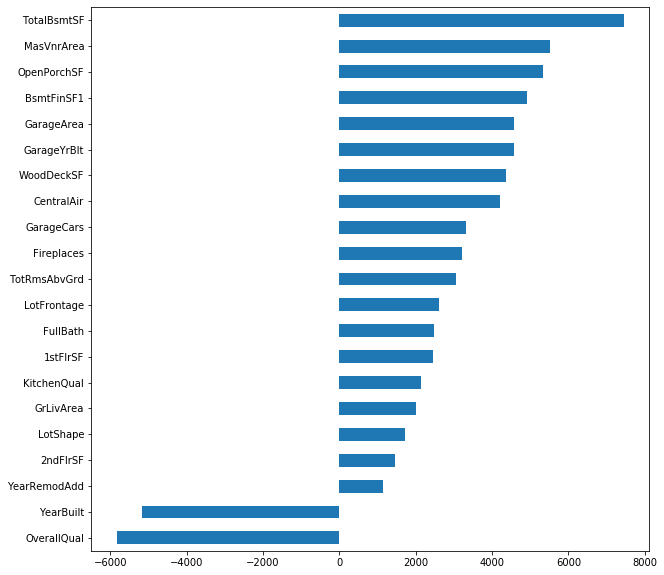

In [20]:
clf_els = ElasticNetCV(l1_ratio=0.9).fit(X, y)
coef = pd.Series(clf_els.coef_, index = features_list).sort_values()
print("alpha: " + str(clf_els.alpha_))
coef.plot(kind='barh')

In [21]:
print("R2: ", np.mean(cross_val_score(ElasticNet(alpha=15.391447962893452, l1_ratio=0.9), X, y, scoring='r2')))

R2:  0.17919372014379734


In [41]:
# Mean Square Error
sgd_reg = SGDRegressor(loss='huber',  max_iter=1000, learning_rate='adaptive')
print("R2: ", np.mean(cross_val_score(sgd_reg, X, y, scoring='r2')))

/opt/anaconda3/envs/MLlingo/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/anaconda3/envs/MLlingo/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/anaconda3/envs/MLlingo/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


R2:  -5.019351970300012


/opt/anaconda3/envs/MLlingo/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/anaconda3/envs/MLlingo/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [ ]:
# Mean Average Error

In [ ]:
# Detect and Remove Outlier using Random Forest

In [32]:
model = Pipeline(
    steps=[('transformer', col_transformer) , ('reg', clf_ridge)]
)
test_df['SalePrice'] = model.predict(test_df)
test_df.to_csv('data/house_price/predict.csv', index=False, columns=['Id', 'SalePrice'])